In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
sub=pd.read_csv("/content/sample_submission.csv")
pred=pd.read_csv("/content/test.csv",usecols=["Employee ID"])

In [ ]:
pred

,Employee ID
0,fffe31003300390039003000
1,fffe31003300310037003800
2,fffe33003400380035003900
3,fffe3100370039003200
4,fffe32003600390036003700
...,...
12245,fffe3900310034003700
12246,fffe32003600330034003000
12247,fffe31003800340039003000
12248,fffe32003600380031003800


In [ ]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [ ]:
test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [ ]:
sub

,Employee ID,Burn Rate
0,fffe32003000360033003200,0.16
1,fffe3700360033003500,0.36
2,fffe31003300320037003900,0.49
3,fffe32003400380032003900,0.20
4,fffe31003900340031003600,0.52


In [ ]:
train.sort_values("Employee ID")

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
5495,fffe3100,2008-04-14,Female,Service,No,2.0,4.0,NaN,0.50
1767,fffe31003000,2008-08-24,Female,Service,No,1.0,5.0,6.5,0.51
5714,fffe3100300030003000,2008-05-04,Male,Product,No,3.0,6.0,4.5,0.33
7042,fffe31003000300030003100,2008-06-12,Female,Product,Yes,3.0,7.0,8.1,0.60
18398,fffe31003000300030003200,2008-07-12,Male,Service,No,2.0,6.0,6.7,0.63
...,...,...,...,...,...,...,...,...,...
2168,fffe3900390039003500,2008-10-01,Female,Service,Yes,3.0,NaN,6.1,0.37
10846,fffe3900390039003600,2008-09-14,Female,Service,No,1.0,2.0,NaN,0.19
7108,fffe3900390039003700,2008-06-27,Female,Product,Yes,3.0,5.0,NaN,0.42
21559,fffe3900390039003800,2008-04-19,Female,Service,Yes,3.0,5.0,6.4,0.41


In [ ]:
test.sort_values("Employee ID")

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
1932,fffe310030003000,2008-12-07,Female,Service,No,4.0,7.0,7.4
4380,fffe31003000300030003000,2008-07-26,Female,Service,Yes,1.0,1.0,5.0
1938,fffe31003000300030003500,2008-09-07,Male,Service,Yes,2.0,3.0,4.7
10065,fffe31003000300030003800,2008-11-20,Female,Service,Yes,2.0,4.0,4.4
2766,fffe3100300030003100,2008-02-18,Female,Service,No,4.0,7.0,6.6
...,...,...,...,...,...,...,...,...
3661,fffe3900390037003800,2008-10-09,Male,Product,Yes,0.0,1.0,4.2
7513,fffe3900390038003900,2008-06-29,Male,Service,No,2.0,6.0,7.4
10891,fffe3900390039003000,2008-07-03,Female,Service,No,2.0,4.0,3.5
5960,fffe3900390039003300,2008-06-12,Male,Product,No,3.0,7.0,6.0


In [ ]:
pd.merge(train,test,how="inner",on=["Employee ID"]) ## no common ids's

,Employee ID,Date of Joining_x,Gender_x,Company Type_x,WFH Setup Available_x,Designation_x,Resource Allocation_x,Mental Fatigue Score_x,Burn Rate,Date of Joining_y,Gender_y,Company Type_y,WFH Setup Available_y,Designation_y,Resource Allocation_y,Mental Fatigue Score_y


In [ ]:
train1=train.dropna(subset=["Burn Rate"])

In [ ]:
train1["Date of Joining"]=pd.DatetimeIndex(train1["Date of Joining"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train1.dtypes

Employee ID                     object
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                    float64
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [ ]:
train1.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [ ]:
train1.shape

(21626, 9)

## EDA

In [ ]:
train1.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
train1.Gender.value_counts()/len(train1)

Female    0.524785
Male      0.475215
Name: Gender, dtype: float64

In [ ]:
train1["Company Type"].value_counts()/len(train1)

Service    0.653103
Product    0.346897
Name: Company Type, dtype: float64

In [ ]:
train1["WFH Setup Available"].value_counts()/len(train1)

Yes    0.540322
No     0.459678
Name: WFH Setup Available, dtype: float64

In [ ]:
train1["Designation"].value_counts()/len(train1)

2.0    0.333210
3.0    0.263479
1.0    0.214187
4.0    0.105197
0.0    0.066540
5.0    0.017386
Name: Designation, dtype: float64

In [ ]:
train1["Resource Allocation"].value_counts()/len(train1)

4.0     0.170813
5.0     0.169703
3.0     0.140017
6.0     0.130260
2.0     0.091926
7.0     0.086932
1.0     0.078655
8.0     0.045871
9.0     0.019791
10.0    0.006936
Name: Resource Allocation, dtype: float64

In [ ]:
train1["Mental Fatigue Score"].value_counts()/len(train1)

6.0    0.020855
5.9    0.020300
5.8    0.020161
6.3    0.019976
6.5    0.019699
         ...   
0.6    0.001017
0.2    0.001017
0.4    0.000740
0.1    0.000694
0.3    0.000509
Name: Mental Fatigue Score, Length: 101, dtype: float64

In [ ]:
train1.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878472,0.691327,0.737556
Resource Allocation,0.878472,1.000000,0.799563,0.856278
Mental Fatigue Score,0.691327,0.799563,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


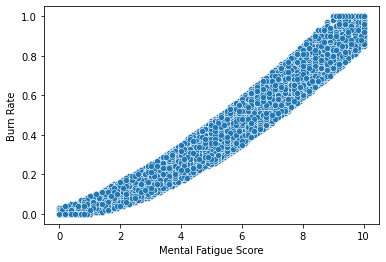

In [ ]:
sns.scatterplot(x="Mental Fatigue Score", y="Burn Rate", data=train1)

In [ ]:
#pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state =123)
reg = LazyRegressor(verbose=1,ignore_warnings=False, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

  5%|▌         | 2/39 [00:00<00:12,  2.86it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8513559317610012, 'RMSE': 0.07597734140941055, 'Time taken': 0.4399292469024658}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9050628508083528, 'RMSE': 0.060719529044008944, 'Time taken': 0.13879752159118652}
{'Model': 'BayesianRidge', 'R-Squared': 0.8680883618992106, 'RMSE': 0.07157343455263969, 'Time taken': 0.026958465576171875}


 15%|█▌        | 6/39 [00:00<00:08,  3.95it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9048108816024453, 'RMSE': 0.060800052388490795, 'Time taken': 0.04219770431518555}
{'Model': 'DummyRegressor', 'R-Squared': -2.0145859691567125e-07, 'RMSE': 0.19706538446055957, 'Time taken': 0.01701831817626953}
{'Model': 'ElasticNet', 'R-Squared': -2.0145859691567125e-07, 'RMSE': 0.19706538446055957, 'Time taken': 0.01725316047668457}


 21%|██        | 8/39 [00:00<00:06,  4.55it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8680987592539001, 'RMSE': 0.07157061376646512, 'Time taken': 0.24620938301086426}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9053452597709799, 'RMSE': 0.0606291507744059, 'Time taken': 0.030262231826782227}
{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9055978955907455, 'RMSE': 0.06054818637020317, 'Time taken': 0.9982233047485352}


 26%|██▌       | 10/39 [01:43<07:29, 15.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.8969058824963875, 'RMSE': 0.06327428464357289, 'Time taken': 101.28474569320679}


 28%|██▊       | 11/39 [01:43<05:08, 11.02s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.904643932390131, 'RMSE': 0.06085334668438448, 'Time taken': 0.5748023986816406}


 33%|███▎      | 13/39 [01:44<02:25,  5.59s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9087704707228303, 'RMSE': 0.059522068894274846, 'Time taken': 0.6925859451293945}
{'Model': 'HuberRegressor', 'R-Squared': 0.8667209187922158, 'RMSE': 0.07194345596162871, 'Time taken': 0.13275432586669922}


 36%|███▌      | 14/39 [01:44<01:39,  3.97s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8891964149023421, 'RMSE': 0.06559748779436637, 'Time taken': 0.1947615146636963}


 38%|███▊      | 15/39 [02:39<07:37, 19.05s/it]

{'Model': 'KernelRidge', 'R-Squared': -4.384589117705113, 'RMSE': 0.4572846104267717, 'Time taken': 54.21873617172241}
{'Model': 'Lars', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499526, 'Time taken': 0.030980825424194336}
{'Model': 'LarsCV', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499526, 'Time taken': 0.04427075386047363}
{'Model': 'Lasso', 'R-Squared': -2.0145859691567125e-07, 'RMSE': 0.19706538446055957, 'Time taken': 0.019377946853637695}


 59%|█████▉    | 23/39 [02:39<02:29,  9.36s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8680980553573903, 'RMSE': 0.07157080473600315, 'Time taken': 0.2080073356628418}
{'Model': 'LassoLars', 'R-Squared': -2.0145859691567125e-07, 'RMSE': 0.19706538446055957, 'Time taken': 0.02118992805480957}
{'Model': 'LassoLarsCV', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499526, 'Time taken': 0.04992818832397461}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499526, 'Time taken': 0.02250218391418457}
{'Model': 'LinearRegression', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499525, 'Time taken': 0.020959138870239258}
{'Model': 'LinearSVR', 'R-Squared': 0.865107142411198, 'RMSE': 0.07237770009340692, 'Time taken': 0.6508574485778809}


 64%|██████▍   | 25/39 [02:41<01:35,  6.85s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8950466537847258, 'RMSE': 0.06384228844667063, 'Time taken': 1.3128645420074463}


 77%|███████▋  | 30/39 [03:05<01:15,  8.35s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8986192112070402, 'RMSE': 0.0627463018147276, 'Time taken': 23.75385618209839}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8047296408620481, 'RMSE': 0.08708201380210355, 'Time taken': 0.023931026458740234}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499526, 'Time taken': 0.0439295768737793}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5209211753162917, 'RMSE': 0.13639981739539817, 'Time taken': 0.025820255279541016}
{'Model': 'RANSACRegressor', 'R-Squared': 0.8642212728638103, 'RMSE': 0.07261497090986557, 'Time taken': 0.04021477699279785}


 79%|███████▉  | 31/39 [03:06<00:49,  6.20s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9060804837667179, 'RMSE': 0.06039322542907915, 'Time taken': 1.1734468936920166}
{'Model': 'Ridge', 'R-Squared': 0.8680884346119594, 'RMSE': 0.07157341482616991, 'Time taken': 0.0251924991607666}
{'Model': 'RidgeCV', 'R-Squared': 0.8680884346119035, 'RMSE': 0.07157341482618504, 'Time taken': 0.02396702766418457}
{'Model': 'SGDRegressor', 'R-Squared': 0.8678356730958803, 'RMSE': 0.07164195448317763, 'Time taken': 0.04748868942260742}


 90%|████████▉ | 35/39 [03:08<00:18,  4.52s/it]

{'Model': 'SVR', 'R-Squared': 0.8872856562954838, 'RMSE': 0.06616066998519682, 'Time taken': 2.3094263076782227}
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8680881004388541, 'RMSE': 0.07157350548499525, 'Time taken': 0.022490739822387695}
[15:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 39/39 [03:09<00:00,  4.86s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9051823175414329, 'RMSE': 0.060681312985683765, 'Time taken': 0.5021858215332031}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9087700126325704, 'RMSE': 0.0595222183329818, 'Time taken': 0.19209766387939453}


In [ ]:
predictions

,R-Squared,RMSE,Time Taken
Model,,,
HistGradientBoostingRegressor,0.91,0.06,0.69
LGBMRegressor,0.91,0.06,0.19
RandomForestRegressor,0.91,0.06,1.17
ExtraTreesRegressor,0.91,0.06,1.00
ExtraTreeRegressor,0.91,0.06,0.03
XGBRegressor,0.91,0.06,0.50
BaggingRegressor,0.91,0.06,0.14
DecisionTreeRegressor,0.90,0.06,0.04
GradientBoostingRegressor,0.90,0.06,0.57


### COMPANY TYPE REDUCES SCORE
### res/men
### des/men
### Adding date 



In [ ]:
train1.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [ ]:
y=train1["Burn Rate"]
X=pd.DataFrame(train1["Mental Fatigue Score"])

In [ ]:
X["Resource Allocation"]=(train1["Resource Allocation"])
X["Designmation"]=train1["Designation"]
X["WFH Setup Available"]=train1["WFH Setup Available"].map({"No":0,"Yes":1})
X=pd.concat([X,pd.get_dummies(train1["Gender"])],axis=1)

#X["duration"]=date

In [ ]:
X.drop("days_count",axis=1,inplace=True)

In [ ]:
X.isnull().sum()

Mental Fatigue Score    1945
Resource Allocation     1278
Designmation               0
WFH Setup Available        0
Female                     0
Male                       0
dtype: int64

In [ ]:
# X["Mental Fatigue Score"]=X["Mental Fatigue Score"].fillna(X["Mental Fatigue Score"].median)
# X["Resource Allocation"]=X["Resource Allocation"].fillna(X["Resource Allocation"].median)
X["des/res"]=X["Designmation"]/X["Resource Allocation"]

# test-submission

# LGBM

In [ ]:
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score
lgm = LGBMRegressor()
scores = cross_val_score(lgm,X,y, cv = 5, scoring = "r2")
scores.mean()

0.9119040339985508

In [ ]:
testx

,Mental Fatigue Score,Resource Allocation,Designmation,WFH Setup Available,Female,Male,des/res
0,7.7,5.0,2.0,0,1,0,0.400000
1,5.2,2.0,1.0,1,1,0,0.500000
2,5.9,3.0,1.0,1,0,1,0.333333
3,4.6,6.0,3.0,0,1,0,0.500000
4,6.4,5.0,2.0,0,1,0,0.400000
...,...,...,...,...,...,...,...
12245,6.1,2.0,1.0,1,1,0,0.500000
12246,5.9,4.0,2.0,1,1,0,0.500000
12247,9.6,7.0,4.0,0,0,1,0.571429
12248,6.7,6.0,3.0,0,0,1,0.500000


In [ ]:
testx=pd.DataFrame(test["Mental Fatigue Score"])
testx["Resource Allocation"]=test["Resource Allocation"]

testx["Designmation"]=test["Designation"]

testx["WFH Setup Available"]=test["WFH Setup Available"].map({"No":0,"Yes":1})

testx=pd.concat([testx,pd.get_dummies(test["Gender"])],axis=1)
testx["des/res"]=testx["Designmation"]/testx["Resource Allocation"]


In [ ]:
testx["m"] = [1 if (ctype == 'Service') else 0  for ctype in test['Company Type']]

In [ ]:
testx.drop("m",axis=1,inplace=True)

In [ ]:
testx

,Mental Fatigue Score,Resource Allocation,Designmation,WFH Setup Available,Female,Male,des/res
0,7.7,5.0,2.0,0,1,0,0.400000
1,5.2,2.0,1.0,1,1,0,0.500000
2,5.9,3.0,1.0,1,0,1,0.333333
3,4.6,6.0,3.0,0,1,0,0.500000
4,6.4,5.0,2.0,0,1,0,0.400000
...,...,...,...,...,...,...,...
12245,6.1,2.0,1.0,1,1,0,0.500000
12246,5.9,4.0,2.0,1,1,0,0.500000
12247,9.6,7.0,4.0,0,0,1,0.571429
12248,6.7,6.0,3.0,0,0,1,0.500000


In [ ]:
from lightgbm import LGBMRegressor
lgm = LGBMRegressor(max_depth=6)
lgm.fit(X,y)
val=lgm.predict(testx)

In [ ]:
pred["Burn Rate"]=val

In [ ]:
pred.to_csv("sub21.csv",index=False)

# XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
xgb=XGBRegressor()
scores = cross_val_score(xgb,X,y, cv = 5, scoring = "r2")
scores.mean()

[20:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9082339052865072

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X,y)
val=xgb.predict(testx)

In [ ]:
pred["Burn Rate"]=val
pred.to_csv("sub2.csv",index=False)

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators=[("xgb",xgb),("lgb",lgm)]
reg = StackingRegressor(estimators=estimators)

## stack

In [ ]:
scores = cross_val_score(reg,X,y, cv = 5, scoring = "r2")
scores.mean()

[15:38:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.9119883506542857

In [ ]:
reg.fit(X,y)
val=reg.predict(testx)
pred["Burn Rate"]=val


[15:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred.to_csv("sub_00.csv",index=False)